In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from yellowbrick.cluster import KElbowVisualizer # visualisasi metode elbow
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score # evaluasi dengan silhoutte score

In [2]:
# load data
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# deskripsi data
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


EDA

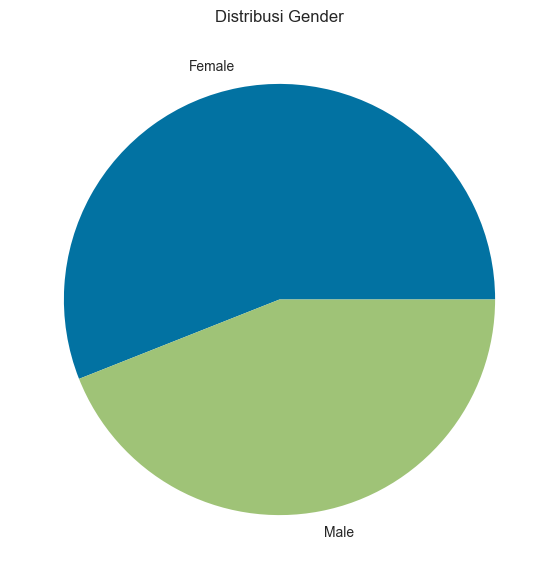

In [5]:
# visualisasi gender dan pie chart
plt.figure(figsize=(7, 7))
plt.pie(data['Gender'].value_counts(), labels=['Female', 'Male'])
plt.title('Distribusi Gender')
plt.show()

In [6]:
# binning pada variabel umur
age18_25 = data.Age[(data.Age >= 18) & (data.Age <= 25)]
age26_35 = data.Age[(data.Age >= 26) & (data.Age <= 35)]
age36_45 = data.Age[(data.Age >= 36) & (data.Age <= 45)]
age46_55 = data.Age[(data.Age >= 46) & (data.Age <= 55)]
age55above = data.Age[data.Age >= 56]


In [7]:
# menyusun data hasil binning untuk visualisasi
x = ['18-25', '26-35', '36-45', '46-55', '55+']
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]

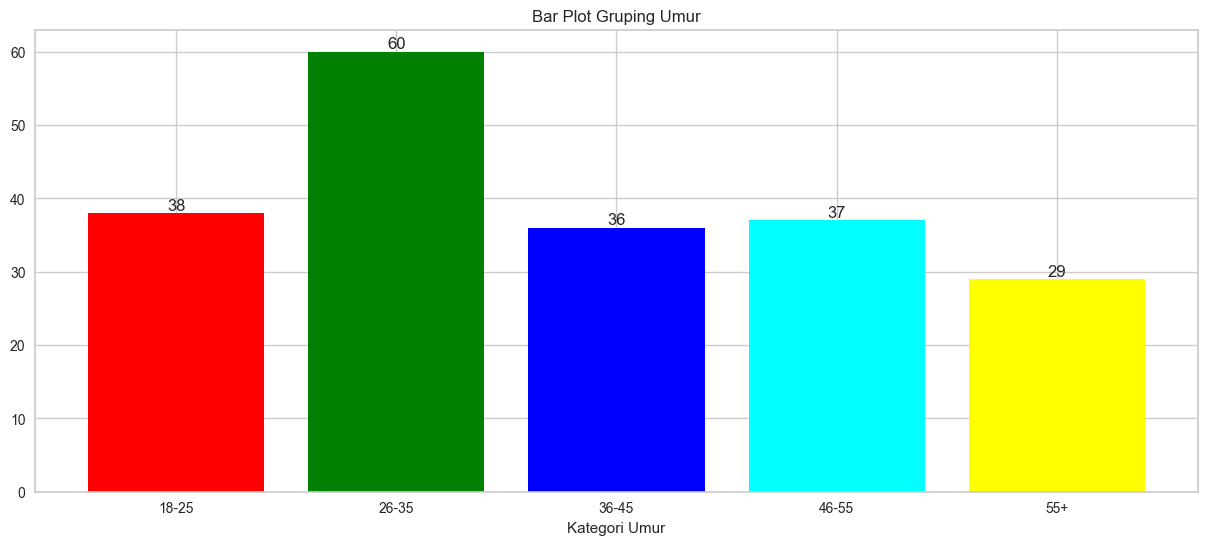

In [8]:
# membuat chart untuk hasil binning
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title('Bar Plot Gruping Umur')
plt.xlabel('Kategori Umur')

# menambahkan label pada bar
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

In [9]:
# binning pada variabel pendapatan
ai0_30 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 0) & (data["Annual Income (k$)"] <= 30)]
ai31_60 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 31) & (data["Annual Income (k$)"] <= 60)]
ai61_90 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 61) & (data["Annual Income (k$)"] <= 90)]
ai91_120 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 91) & (data["Annual Income (k$)"] <= 120)]
ai121_150 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 121) & (data["Annual Income (k$)"] <= 150)]

In [10]:
# menyusun data hasil binning untuk visualisasi
aix = ['0-30', '31-60', '61-90', '91-120', '121-150']
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

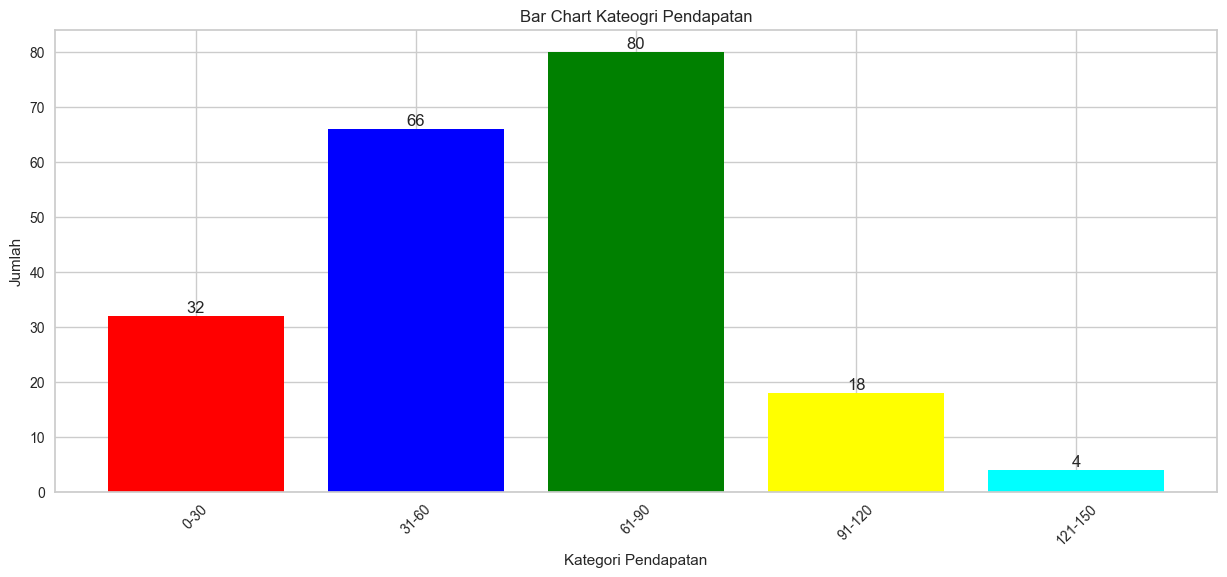

In [11]:
# membuat chart untuk hasil binning
plt.figure(figsize=(15, 6))
plt.bar(aix, aiy, color=['red', 'blue', 'green', 'yellow', 'cyan'])
plt.title('Bar Chart Kateogri Pendapatan')
plt.xlabel('Kategori Pendapatan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)

# menambahkan label pada bar
for i in range(len(aix)):
    plt.text(i, aiy[i], aiy[i], ha='center', va='bottom')

plt.show()

In [12]:
# mengambil kolom yang dituju
X = data.iloc[:, [3, 4]].values

In [13]:
# menampilkan data yang dituju dalam bentuk data frame
print(pd.DataFrame(X, columns=['Annual Income', 'Spending Score']))

     Annual Income  Spending Score
0               15              39
1               15              81
2               16               6
3               16              77
4               17              40
..             ...             ...
195            120              79
196            126              28
197            126              74
198            137              18
199            137              83

[200 rows x 2 columns]


Selanjutnya akan lanjut ke tahapan modelling.
Klustering dilakukan berdasarkan pendapatan tahunan dan skor pengeluaran mereka

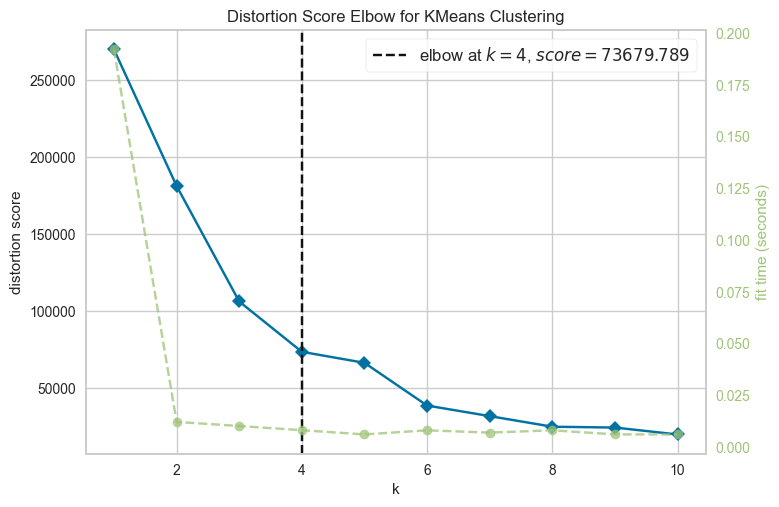

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
# elbow method untuk menentukan jumlah kluster yang optimal
kmeans = KMeans()

# inisialisasi dengan KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k=(1, 11))

# fit visualizer dengan data
visualizer.fit(X)

# show
visualizer.show()

Modelling

In [15]:
from sklearn.cluster import KMeans

In [16]:
# inisalisasi model dengan k = 4
kmeans = KMeans(n_clusters=4, random_state=0)

# fit model
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [17]:
# mendapatkan label kluster
labels = kmeans.labels_

In [18]:
# fungsi untuk menganalisis karakteristik kluster
def analyze_cluster(X, labels, k):
    print('Analisis Karakteristik Kluster : ')
    for cluster_id in range(k):
        # mengambnil data untuk kluster saat ini
        cluster_data = X[labels == cluster_id]

        # rata-rata setiap kluster
        mean_income = cluster_data[:,0].mean() # rata-rata income
        mean_spending = cluster_data[:,1].mean() # rat-rata spending

        print(f'\n Cluster {cluster_id + 1}:')
        print(f'Rata-rata Annual Income (k$): {mean_income:.2f}')
        print(f'Rata-rata Spending Score(1-100): {mean_spending:.2f}')

In [19]:
# apply fungsi
analyze_cluster(X, labels,4)

Analisis Karakteristik Kluster : 

 Cluster 1:
Rata-rata Annual Income (k$): 48.26
Rata-rata Spending Score(1-100): 56.48

 Cluster 2:
Rata-rata Annual Income (k$): 86.54
Rata-rata Spending Score(1-100): 82.13

 Cluster 3:
Rata-rata Annual Income (k$): 87.00
Rata-rata Spending Score(1-100): 18.63

 Cluster 4:
Rata-rata Annual Income (k$): 26.30
Rata-rata Spending Score(1-100): 20.91


Memvisualisasikan Kluster

In [20]:
import matplotlib.pyplot as plt

In [21]:
# menentukan posisi centroid
centroids = kmeans.cluster_centers_

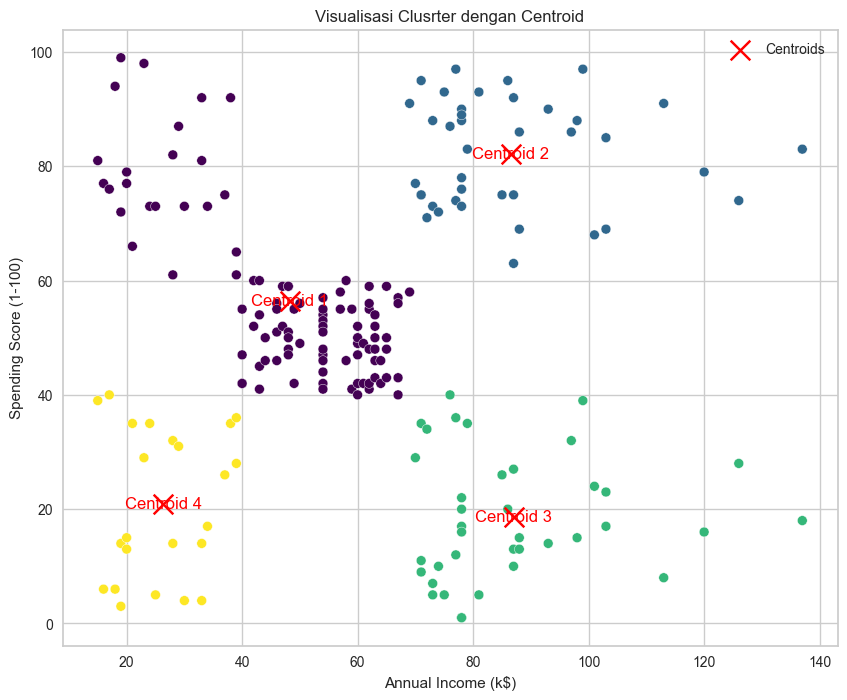

In [22]:
# visualisasi centroid
plt.figure(figsize=(10, 8))

# plot data (scatter plot)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50, edgecolors='w', marker='o')

# plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')

# menambahkan label centroid pada plot
for i, centroid, in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')


# menambahkan judul dan label
plt.title('Visualisasi Clusrter dengan Centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.show()